Resize content and mask

In [1]:
# Common import
import numpy as np
import skimage.io as io

import scipy
import scipy.io as sio
from PIL import Image
from resizeimage import resizeimage

## Load the data

In [2]:
# Files locations
CONTENT_DIR = "./data/content"
MASK_DIR = "./data/mask"

In [3]:
# Files name
image = "elephant.jpg"
annotations = "elephant-sem4.mat"
save_name = "elephant-res400"

In [4]:
# Define the whole path
path_content = CONTENT_DIR + '/' + image
path_mask = MASK_DIR + '/' + annotations

In [5]:
# Load the image and mask
content = Image.open(path_content)
mask = sio.loadmat(path_mask)["S"]

## Visualisation

In [6]:
# Different values in the mask
value = np.unique(mask)
value

array([ 22,  37,  94, 150], dtype=uint8)

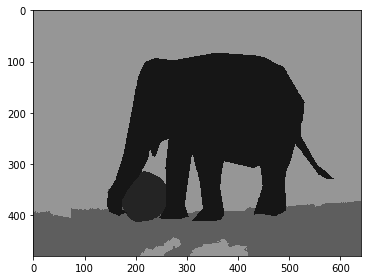

In [7]:
io.imshow(mask)
io.show()

## Resize content image

In [8]:
# Define shape the image and mask will be resize
# I'm cropping first to remove consitent semantic region then resize it
# resize shape does not have to be equalled to the crop_shape (ie 200 x 200)
crop_shape = (400, 400)
resize_shape = (400, 400)

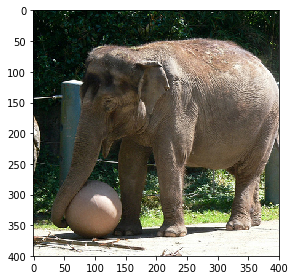

In [9]:
content = resizeimage.resize_crop(content, crop_shape)
content= content.resize(resize_shape)
io.imshow(np.asarray(content, dtype="uint8" ))
io.show()

## Resize mask

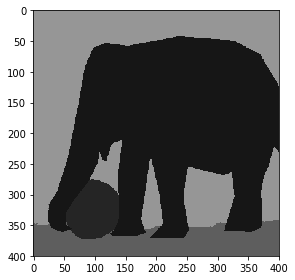

In [10]:
mask = np.dstack((mask,) * 3)
mask = Image.fromarray(mask, 'RGB')
mask = resizeimage.resize_crop(mask, crop_shape)
mask = mask.resize(resize_shape)
io.imshow(np.asarray(mask, dtype="uint8"))
io.show()

## Save Image

In [11]:
# Name of the file to save
save_content = CONTENT_DIR + '/' + save_name + ".jpg"
save_mask = MASK_DIR + '/' + save_name  + ".mat"

In [12]:
# Save the content image
io.imsave(save_content, content)

In [13]:
# Convert mask
mask = np.array(mask, dtype = np.uint8)
mask = mask[:,:,0]

In [14]:
# Save mask to .mat
mask_to_save = {}
mask_to_save["S"] = mask
sio.savemat(save_mask, mask_to_save)